<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [3]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [4]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [5]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [6]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [7]:
#Calculamos el numero total de la población "n"
Barcelona['availability_365']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
18927 non-null  int64
dtypes: int64(1)
memory usage: 148.0 KB


In [8]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['availability_365'].max()
Min=Barcelona['availability_365'].min()
Limites= [Min, Max]
Limites

[0, 365]

In [9]:
#Calculamos el rango R
R=Max-Min
R

365

In [11]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(18927)
ni

15.199911516657144

In [12]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

24.01329768268763

**Creación de Categorias a partir de clases**

In [13]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.99, 365.1, 16)
intervalos

array([ -0.99 ,  23.416,  47.822,  72.228,  96.634, 121.04 , 145.446,
       169.852, 194.258, 218.664, 243.07 , 267.476, 291.882, 316.288,
       340.694, 365.1  ])

In [14]:
#Creamos las categorías 
categorias= ["Categoría1 (0-23.4 availability_365)", "Categoría2 (23.5-47.82 availability_365)","Categoría3 (47.83-72.2 availability_365)", "Categoría4 (72.3-96.6 availability_365)",
             "Categoría5 (96.7-121.04 availability_365)", "Categoría6 (121.05-145.46 availability_365)","Categoría7 (145.47-169.8 availability_365)", "Categoría8 (169.9-194.25 availability_365)", "Categoría9 (194.26-218.6 availability_365)", "Categoría10 (218.7-243.07 availability_365)","Categoría11 (243.08-267.47 availability_365)", "Categoría12 (267.48-291.8 availability_365)",
             "Categoría13 (291.882-316.288 availability_365)", "Categoría14 (316.289-340.694 availability_365)","Categoría15 (340.695-365.1 availability_365)"
             ]

In [15]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['availability_365']=pd.cut(x= Barcelona['availability_365'], bins=intervalos, labels= categorias)
Barcelona['availability_365']

0              Categoría3 (47.83-72.2 availability_365)
1            Categoría8 (169.9-194.25 availability_365)
2              Categoría2 (23.5-47.82 availability_365)
3        Categoría14 (316.289-340.694 availability_365)
4          Categoría15 (340.695-365.1 availability_365)
5        Categoría13 (291.882-316.288 availability_365)
6           Categoría12 (267.48-291.8 availability_365)
7            Categoría9 (194.26-218.6 availability_365)
8           Categoría10 (218.7-243.07 availability_365)
9          Categoría11 (243.08-267.47 availability_365)
10                 Categoría1 (0-23.4 availability_365)
11                 Categoría1 (0-23.4 availability_365)
12       Categoría13 (291.882-316.288 availability_365)
13              Categoría4 (72.3-96.6 availability_365)
14       Categoría13 (291.882-316.288 availability_365)
15         Categoría15 (340.695-365.1 availability_365)
16         Categoría15 (340.695-365.1 availability_365)
17          Categoría6 (121.05-145.46 availabili

In [16]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['availability_365'].value_counts().reset_index()
Tabla_freq

availability_365  count
0             Categoría1 (0-23.4 availability_365)   3283
1     Categoría15 (340.695-365.1 availability_365)   2376
2   Categoría14 (316.289-340.694 availability_365)   1679
3   Categoría13 (291.882-316.288 availability_365)   1558
4      Categoría12 (267.48-291.8 availability_365)   1279
5     Categoría11 (243.08-267.47 availability_365)   1160
6       Categoría8 (169.9-194.25 availability_365)   1083
7          Categoría4 (72.3-96.6 availability_365)    974
8      Categoría10 (218.7-243.07 availability_365)    958
9      Categoría6 (121.05-145.46 availability_365)    897
10      Categoría7 (145.47-169.8 availability_365)    821
11        Categoría3 (47.83-72.2 availability_365)    784
12       Categoría5 (96.7-121.04 availability_365)    755
13      Categoría9 (194.26-218.6 availability_365)    722
14        Categoría2 (23.5-47.82 availability_365)    598

In [17]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

availability_365  count
0             Categoría1 (0-23.4 availability_365)   3283
1     Categoría15 (340.695-365.1 availability_365)   2376
2   Categoría14 (316.289-340.694 availability_365)   1679
3   Categoría13 (291.882-316.288 availability_365)   1558
4      Categoría12 (267.48-291.8 availability_365)   1279
5     Categoría11 (243.08-267.47 availability_365)   1160
6       Categoría8 (169.9-194.25 availability_365)   1083
7          Categoría4 (72.3-96.6 availability_365)    974
8      Categoría10 (218.7-243.07 availability_365)    958
9      Categoría6 (121.05-145.46 availability_365)    897
10      Categoría7 (145.47-169.8 availability_365)    821
11        Categoría3 (47.83-72.2 availability_365)    784
12       Categoría5 (96.7-121.04 availability_365)    755
13      Categoría9 (194.26-218.6 availability_365)    722
14        Categoría2 (23.5-47.82 availability_365)    598

In [18]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('availability_365')
Filtro_index

count
availability_365                                     
Categoría1 (0-23.4 availability_365)             3283
Categoría15 (340.695-365.1 availability_365)     2376
Categoría14 (316.289-340.694 availability_365)   1679
Categoría13 (291.882-316.288 availability_365)   1558
Categoría12 (267.48-291.8 availability_365)      1279
Categoría11 (243.08-267.47 availability_365)     1160
Categoría8 (169.9-194.25 availability_365)       1083
Categoría4 (72.3-96.6 availability_365)           974
Categoría10 (218.7-243.07 availability_365)       958
Categoría6 (121.05-145.46 availability_365)       897
Categoría7 (145.47-169.8 availability_365)        821
Categoría3 (47.83-72.2 availability_365)          784
Categoría5 (96.7-121.04 availability_365)         755
Categoría9 (194.26-218.6 availability_365)        722
Categoría2 (23.5-47.82 availability_365)          598

Text(0, 0.5, 'Frecuencia')

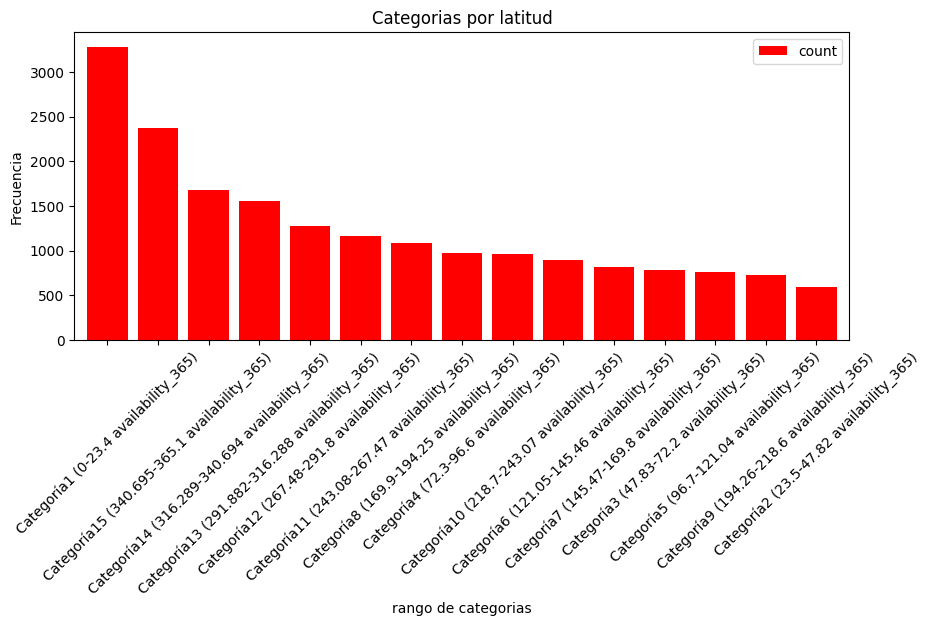

In [19]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')